In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')

In [11]:
# Load dataset
df = pd.read_csv('Bank_term_deposit.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [12]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
# Basic overview
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [15]:
# Checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
# Checking for duplicates
df.duplicated().sum()

0

Exploratory Data Analysis (EDA)

In [17]:
cat_cols = df.select_dtypes('object').columns.difference(['deposit'])
cat_cols

Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'poutcome'],
      dtype='object')

In [18]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

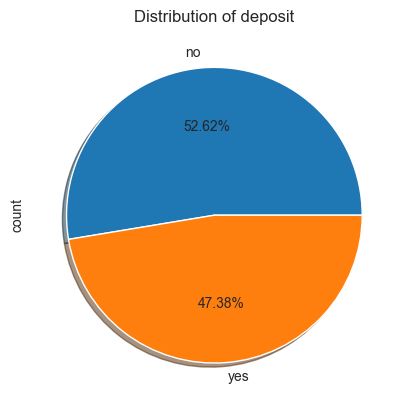

In [19]:
# Target feature i.e. 'deposit'
df['deposit'].value_counts().plot(kind='pie', autopct='%.2f%%',shadow=True, title='Distribution of deposit')
plt.show()

As can be seen, the 'deposit' feature is balanced. It means, both category is nearly equally distributed.

In [20]:
cat_cols

Index(['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'poutcome'],
      dtype='object')

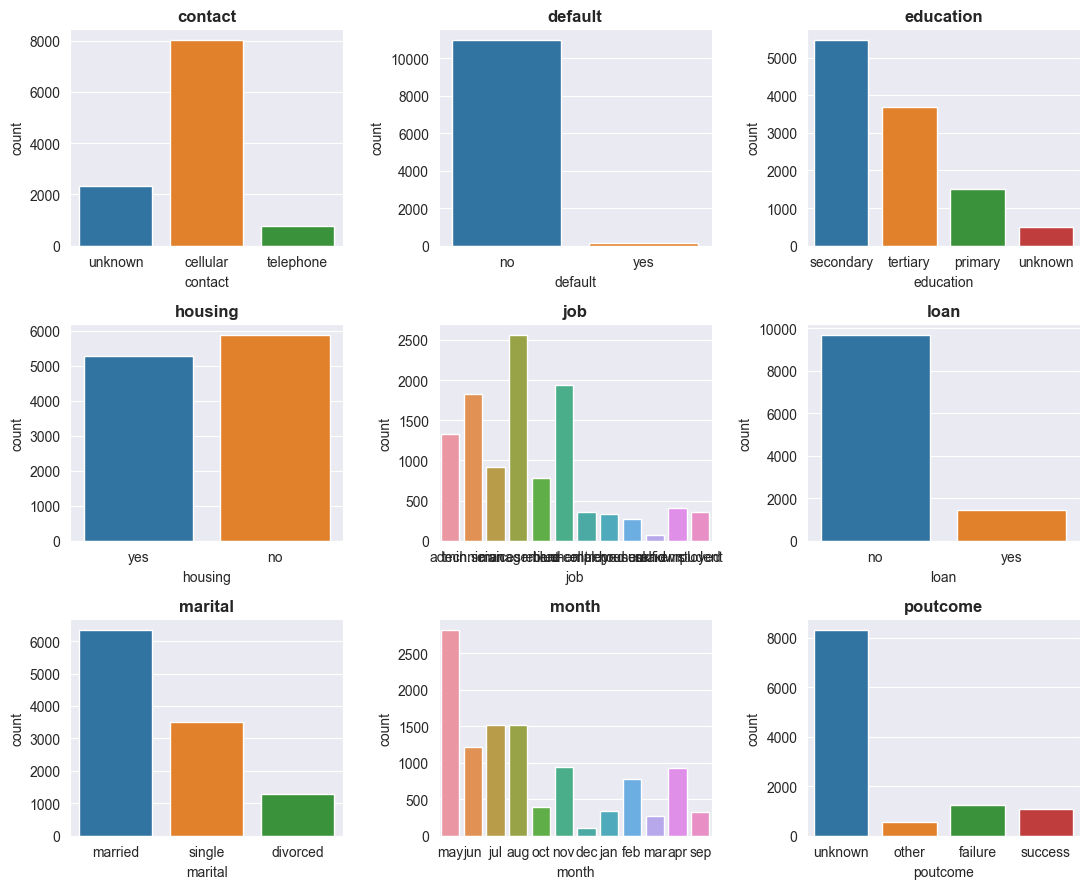

In [21]:
plt.figure(figsize=(11,9))
for index,col in enumerate(cat_cols):
    plt.subplot(3,3, index+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col}", fontweight='bold')
plt.tight_layout()

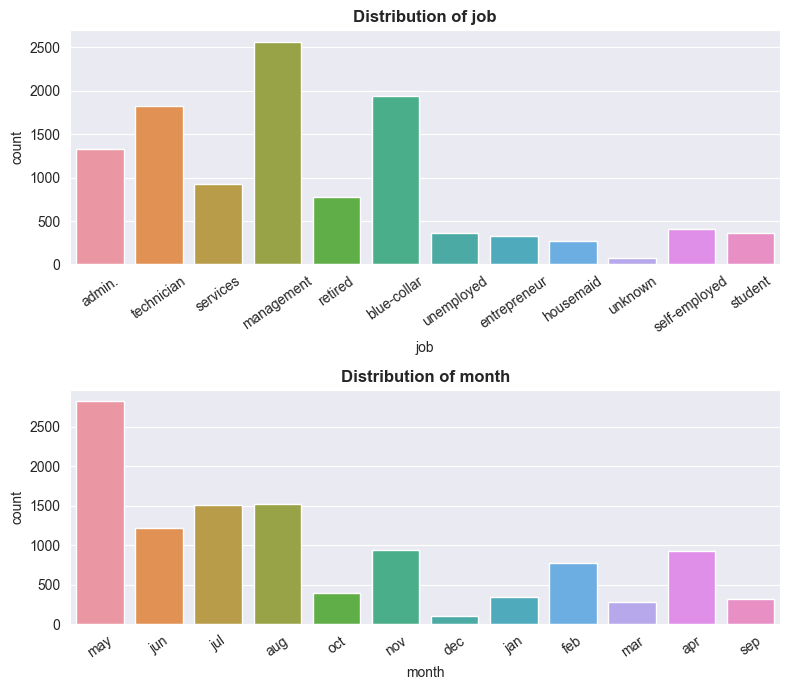

In [22]:
# 'Job' and 'month'
plt.figure(figsize=(8,7))
for index, i in enumerate(['job','month']):
    plt.subplot(2,1, index+1)
    sns.countplot(x=i, data=df)
    plt.title(f"Distribution of {i}", fontweight='bold')
    plt.xticks(rotation=35)
plt.tight_layout()

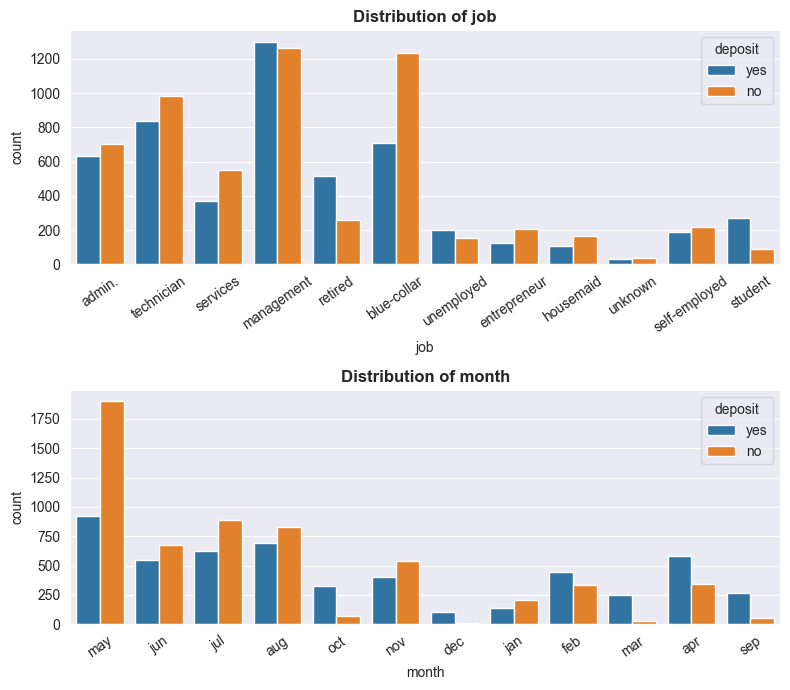

In [23]:
plt.figure(figsize=(8,7))
for index, i in enumerate(['job','month']):
    plt.subplot(2,1, index+1)
    sns.countplot(x=i, data=df, hue='deposit')
    plt.title(f"Distribution of {i}", fontweight='bold')
    plt.xticks(rotation=35)
plt.tight_layout()

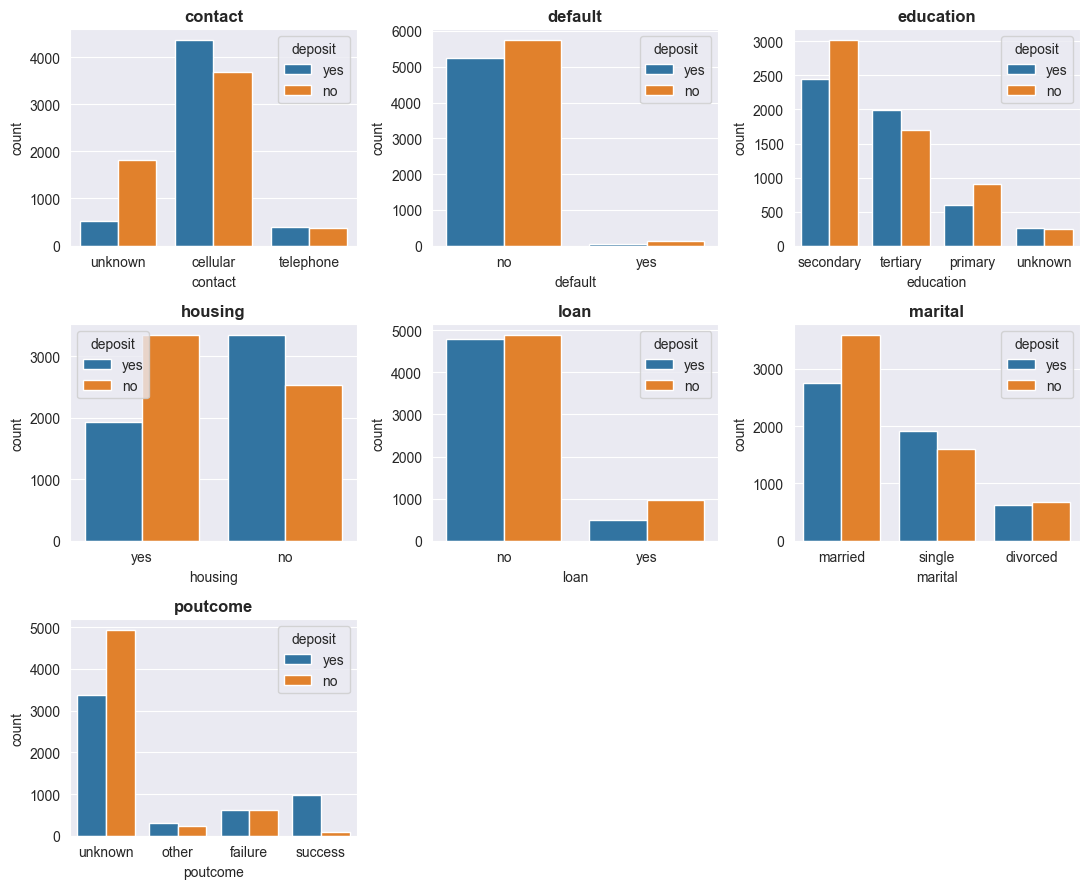

In [24]:
columns = cat_cols.difference(['job','month'])

plt.figure(figsize=(11,9))
for index,col in enumerate(columns):
    plt.subplot(3,3, index+1)
    sns.countplot(x=col, data=df, hue='deposit')
    plt.title(f"{col}", fontweight='bold')
plt.tight_layout()

In [25]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

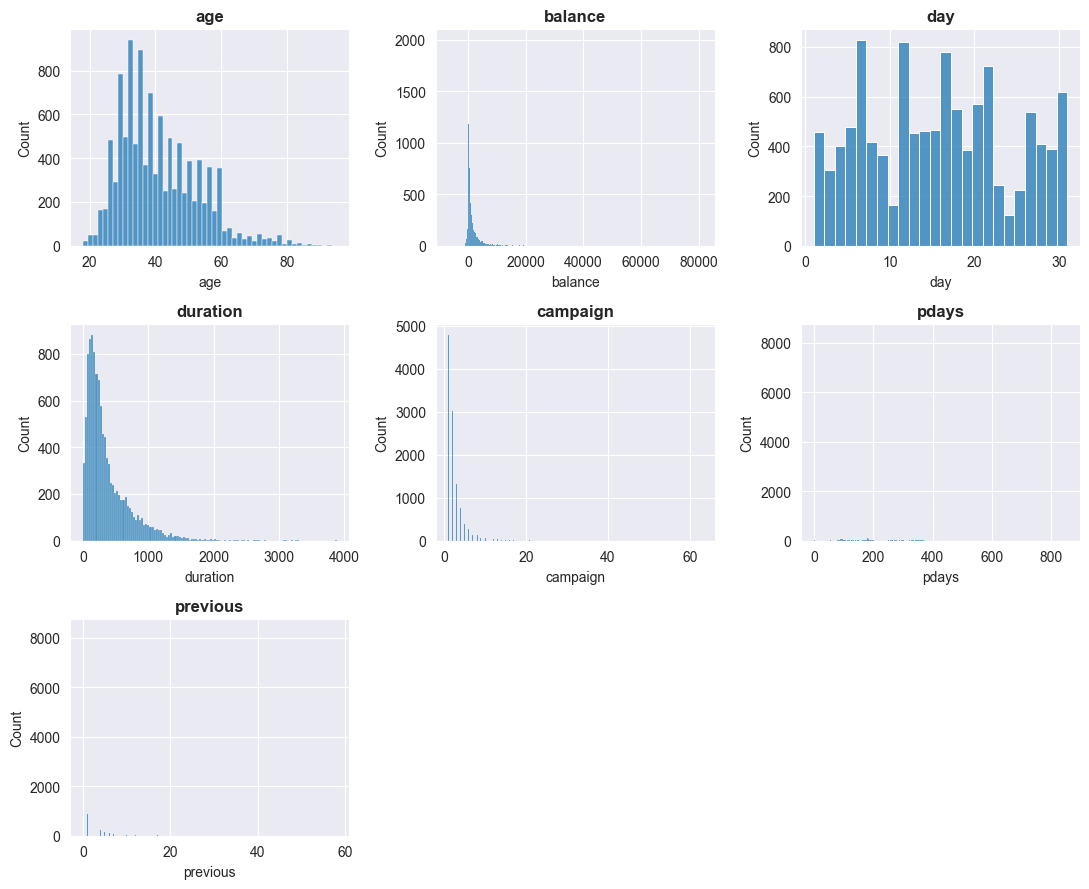

In [26]:
plt.figure(figsize=(11,9))
for index,k in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    sns.histplot(x=k, data=df)
    plt.title(f"{k}", fontweight='bold')
plt.tight_layout()

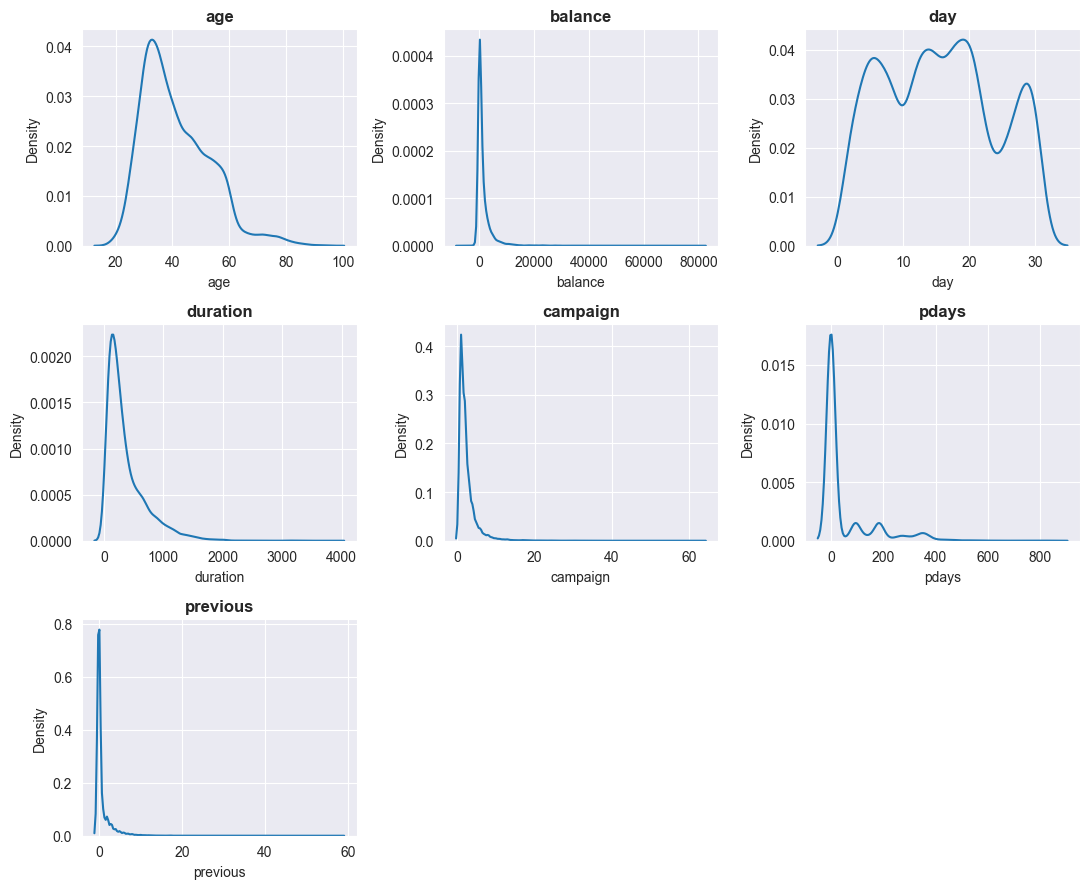

In [27]:
plt.figure(figsize=(11,9))
for index,k in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    sns.kdeplot(x=k, data=df)
    plt.title(f"{k}", fontweight='bold')
plt.tight_layout()

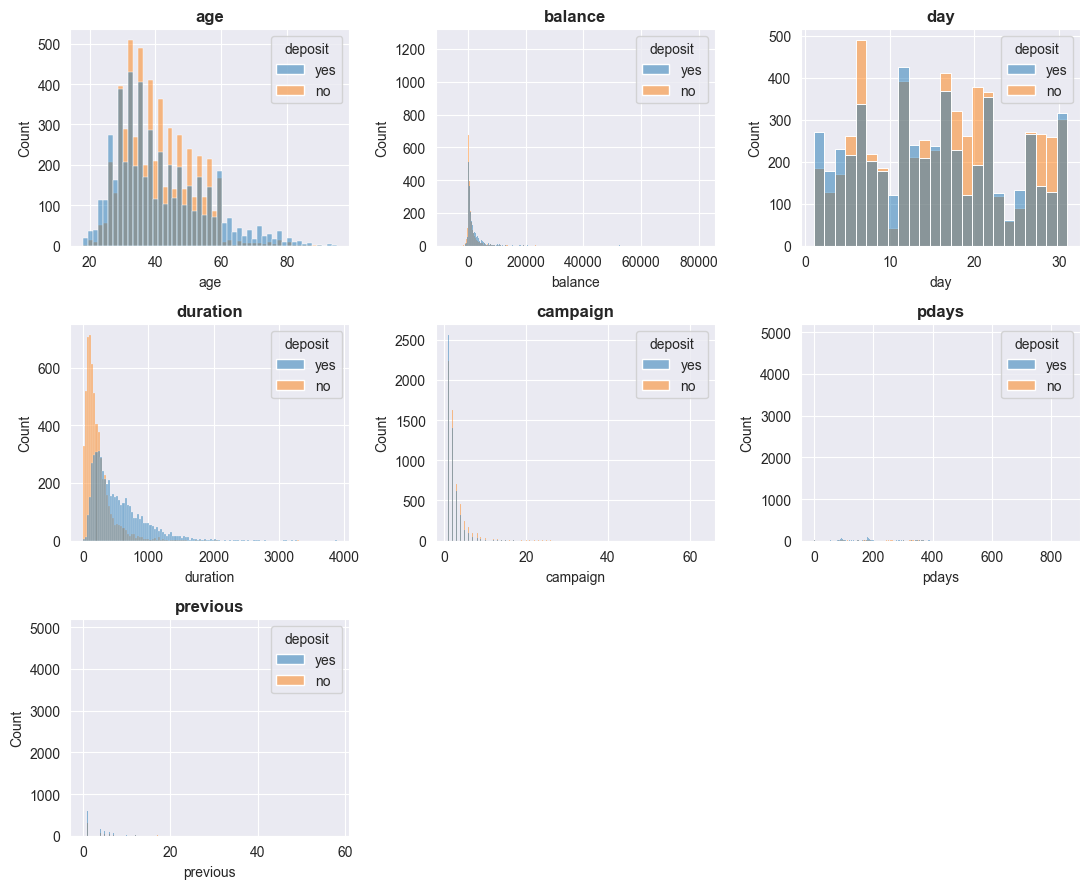

In [28]:
plt.figure(figsize=(11,9))
for index,k in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    sns.histplot(x=k, data=df, hue='deposit')
    plt.title(f"{k}", fontweight='bold')
plt.tight_layout()

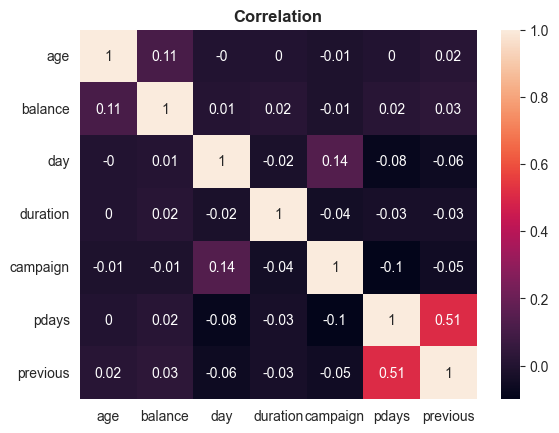

In [29]:
corr = round(df[num_cols].corr(),2)
sns.heatmap(corr, annot=True)
plt.title("Correlation", fontweight='bold')
plt.show()

### Data Preprocessing

In [30]:
# Assigning the low frequency classes to 'others'
counts = df['job'].value_counts()
threshold =700
repl = counts[counts < threshold].index
df['job'] = df['job'].replace(repl, 'others')

In [31]:
# Encoding 'month' feature 
df['month'] = df['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 
                 'oct':10, 'nov':11, 'dec':12})

In [32]:
cat_features = df.select_dtypes('object').columns.difference(['deposit'])
num_features = df.select_dtypes(exclude='object').columns

In [33]:
# Assigning input and target feature to x and y respectively
x = df.drop(columns=['deposit'])
y = df['deposit']

In [34]:
# Data partioning
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [35]:
# Categorical pipeline
cat_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder()),
    ('ss', StandardScaler(with_mean=False))
])

In [36]:
num_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='median')),
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),
    ('ss', StandardScaler(with_mean=False))
])

In [37]:
preprocessor = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_features),
    ('num_pipeline', num_pipeline, num_features)
])

In [38]:
# Target encoding
le = LabelEncoder()
y_train_arr = le.fit_transform(y_train)
y_test_arr = le.transform(y_test)

In [39]:
# Input features encoding
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)

### Model Training

In [40]:
# Model evaluation

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "K-nearest Classifier": KNeighborsClassifier()
}

model_list = []
model_accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_arr, y_train_arr)
    
    y_train_pred = model.predict(X_train_arr)
    y_test_pred = model.predict(X_test_arr)
    
    train_model_accuracy = accuracy_score(y_train_arr, y_train_pred)
    test_model_accuracy = accuracy_score(y_test_arr, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance on Train set : ")
    print("Accuracy_score : {:.2f}".format(train_model_accuracy))
    print()
    print("Model Performance on Test set : ")
    print("Accuracy_score : {:.2f}".format(test_model_accuracy))
    
    model_accuracy_list.append(test_model_accuracy)
    
    print("="*35)
    print("\n")

Logistic Regression
Model Performance on Train set : 
Accuracy_score : 0.80

Model Performance on Test set : 
Accuracy_score : 0.82


Decision Tree
Model Performance on Train set : 
Accuracy_score : 1.00

Model Performance on Test set : 
Accuracy_score : 0.79


Random Forest
Model Performance on Train set : 
Accuracy_score : 1.00

Model Performance on Test set : 
Accuracy_score : 0.85


AdaBoost
Model Performance on Train set : 
Accuracy_score : 0.83

Model Performance on Test set : 
Accuracy_score : 0.83


Gradient Boost
Model Performance on Train set : 
Accuracy_score : 0.86

Model Performance on Test set : 
Accuracy_score : 0.86


Support Vector Classifier
Model Performance on Train set : 
Accuracy_score : 0.83

Model Performance on Test set : 
Accuracy_score : 0.84


K-nearest Classifier
Model Performance on Train set : 
Accuracy_score : 0.83

Model Performance on Test set : 
Accuracy_score : 0.75




In [41]:
model_report = pd.DataFrame(list(zip(model_list, model_accuracy_list)), columns=['Models', 'Accuracy_score']).sort_values(by=['Accuracy_score'], ascending=False)
model_report

,Models,Accuracy_score
4,Gradient Boost,0.859830
2,Random Forest,0.852665
5,Support Vector Classifier,0.841469
3,AdaBoost,0.829378
0,Logistic Regression,0.824451
1,Decision Tree,0.793551
6,K-nearest Classifier,0.751903


In [42]:
l_reg = LogisticRegression()
l_reg.fit(X_train_arr, y_train_arr)

y_test_pred = l_reg.predict(X_test_arr)
print(f"Accuracy of the model : {accuracy_score(y_test_arr, y_test_pred)}")

Accuracy of the model : 0.8244514106583072


In [43]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train_arr, y_train_arr)

y_test_pred = r_forest.predict(X_test_arr)
print(f"Accuracy of the model : {accuracy_score(y_test_arr, y_test_pred)}")

Accuracy of the model : 0.8589341692789969


In [44]:
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train_arr, y_train_arr)

y_test_pred = g_boost.predict(X_test_arr)
print(f"Accuracy of the model : {accuracy_score(y_test_arr, y_test_pred)}")

Accuracy of the model : 0.8598298253470668
